In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


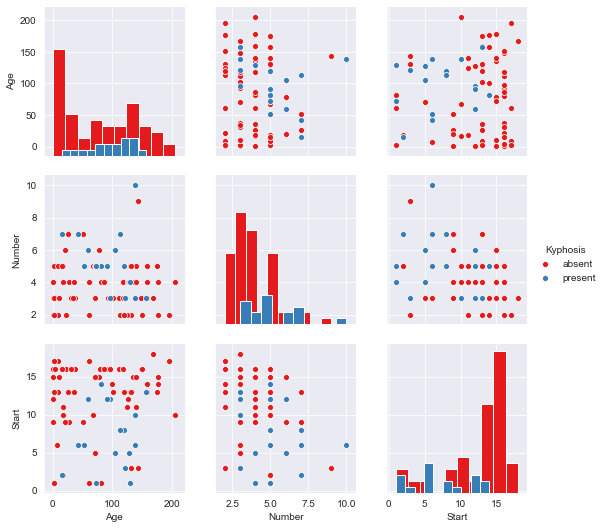

In [11]:
sns.set_style('darkgrid')
sns.pairplot(data=df,hue='Kyphosis',diag_kind='hist',palette='Set1')

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dtc=DecisionTreeClassifier()

In [107]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [108]:
predict=dtc.predict(X_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

      absent       0.86      1.00      0.93        19
     present       1.00      0.50      0.67         6

    accuracy                           0.88        25
   macro avg       0.93      0.75      0.80        25
weighted avg       0.90      0.88      0.86        25



[[19  0]
 [ 3  3]]


In [409]:
from sklearn.ensemble import RandomForestClassifier

In [410]:
rfc=RandomForestClassifier(n_estimators=96)

In [301]:
error_rate=[]
for i in range(1,500):
    rfc_test=RandomForestClassifier(n_estimators=i)
    rfc_test.fit(X_train,y_train)
    predictT=rfc_test.predict(X_test)
    error_rate.append(np.mean(y_test!=predictT))

In [302]:
error_rate

[0.32,
 0.2,
 0.2,
 0.2,
 0.2,
 0.24,
 0.12,
 0.16,
 0.12,
 0.2,
 0.16,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.2,
 0.12,
 0.16,
 0.2,
 0.2,
 0.16,
 0.2,
 0.12,
 0.2,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.2,
 0.16,
 0.2,
 0.16,
 0.16,
 0.2,
 0.16,
 0.24,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.2,
 0.12,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.2,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,

Text(0.5, 1.0, 'Estimator Values vs Error_rate')

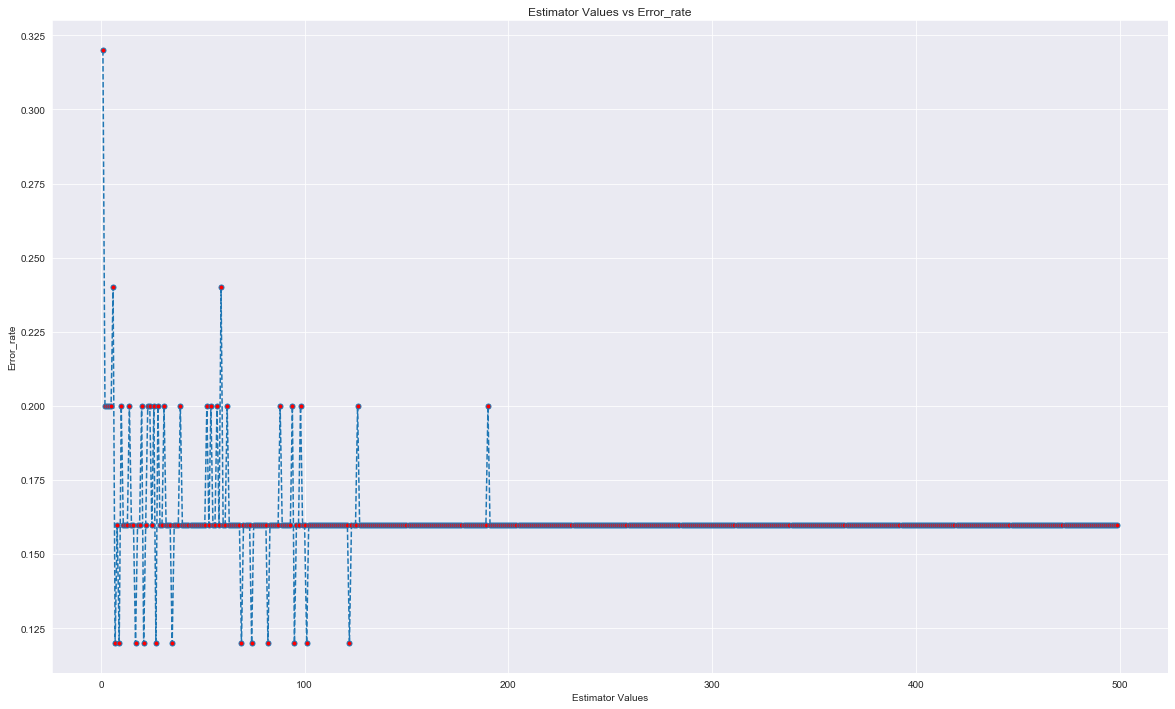

In [303]:
plt.figure(figsize=(20,12))
plt.plot(range(1,500),error_rate,marker='o',markerfacecolor='red',markersize=5,linestyle='--')
plt.xlabel('Estimator Values')
plt.ylabel('Error_rate')
plt.title('Estimator Values vs Error_rate')

In [235]:
import cufflinks as cf

cf.go_offline()

In [272]:
aea=pd.Series(data=error_rate,index=range(1,500))

ValueError: Length of passed values is 123, index implies 499

In [304]:
aea.iplot()

In [411]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=96,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [412]:
Rpredict=rfc.predict(X_test)

In [413]:
Rpredict

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype=object)

In [420]:
print(classification_report(y_test,Rpredict))
print('\n')
print(confusion_matrix(y_test,Rpredict))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25



[[19  0]
 [ 4  2]]
